# Visualize effect of UseHighMassRatioVersion flag on "PNR window" parameter

In [9]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import splot,q2m1m2,lim
from glob import glob
import lalsimulation as lalsim
from scipy import interpolate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
?lalsim.SimPhenomPNRwindow

Docstring: SimPhenomPNRwindow(REAL8 m1_SI, REAL8 m2_SI, REAL8 chi1x, REAL8 chi1y, REAL8 chi1z, REAL8 chi2x, REAL8 chi2y, REAL8 chi2z, Dict lalParams) -> REAL8
Type:      builtin_function_or_method


In [11]:
# Define python wrapper for lalsim.SimPhenomPNRwindow
def PNRwindow( q, a1, theta_LS, UseHighMassRatioVersion=0 ):
    
    # Import usefuls 
    from numpy import ndarray, array, arange, double
    from positive.units import codef,codeh,codehf,physf
    from positive import sYlm
    import lalsimulation as lalsim
    import lal
    
    #
    m1,m2 = q2m1m2(float(q))
    s1 = array( [a1*sin(theta_LS),0,a1*cos(theta_LS)] )
    
    #
    Mtot = 100.0
    M1 = m1 * Mtot/ ( m1 + m2 )
    M2 = m2 * Mtot / ( m1 + m2 )
    
    #
    lalparams = lal.CreateDict()
    # Turn off multibanding
    lalsim.SimInspiralWaveformParamsInsertPhenomXHMThresholdMband(lalparams, 0)
    lalsim.SimInspiralWaveformParamsInsertPhenomXPHMThresholdMband(lalparams, 0)
    # Tell the model to return the coprecessing mode -- only works on our development branches
    lalsim.SimInspiralWaveformParamsInsertPhenomXReturnCoPrec(lalparams, 1)
    
    
    #########################################
    # Toggle Use of High Mass Ratio Version #
    #########################################
    lalsim.SimInspiralWaveformParamsInsertPhenomXPNRUseHighMassRatioVersion( lalparams, UseHighMassRatioVersion ) 
    
    #
    lalsim.SimInspiralWaveformParamsInsertPhenomXPNRUseTunedAngles( lalparams, 1 )
    lalsim.SimInspiralWaveformParamsInsertPhenomXPNRUseTunedCoprec( lalparams, 1 )
    lalsim.SimInspiralWaveformParamsInsertPhenomXAntisymmetricWaveform( lalparams, 1 )
    lalsim.SimInspiralWaveformParamsInsertPhenomXPNRForceXHMAlignment( lalparams, 0 )
    
    #
    distance_Mpc= 100.0
    distance_SI    = distance_Mpc*1.0e6*lal.PC_SI
    m1_SI = lal.MSUN_SI*M1
    m2_SI = lal.MSUN_SI*M2
    chi1x, chi1y, chi1z = s1
    chi2x, chi2y, chi2z = 0,0,0
    
    #
    # print(chi1x, chi1y, chi1z)
    window = lalsim.SimPhenomPNRwindow( m1_SI, m2_SI, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lalparams ) 
    
    #
    return window

### Visualize window along $m_1/m_2$
Here we compare how coprecessing tuning is applied to XO4a on parameter space slices.

Text(0, 0.5, 'XPNR-CP Window')

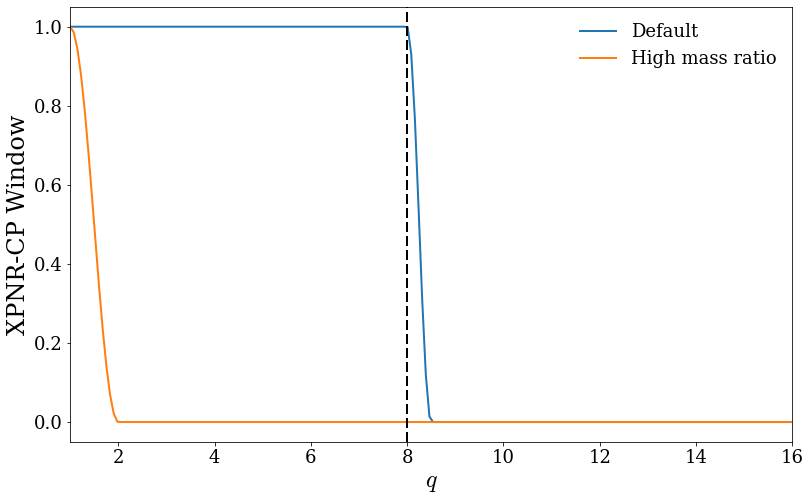

In [12]:
# Define parameter range
a1 = 0.2
theta_LS = 0.6
q_range = linspace(1,16,200)

# Default version
default_window = array( [ PNRwindow( q, a1, theta_LS, UseHighMassRatioVersion=0 ) for q in q_range ] )
# High q version
himasra_window = array( [ PNRwindow( q, a1, theta_LS, UseHighMassRatioVersion=1 ) for q in q_range ] )

figure( figsize=2*figaspect(0.618) )
plot( q_range, default_window, lw=2, label='Default' )
plot( q_range, himasra_window, lw=2, label='High mass ratio' )
axvline(8,ls='--',color='k',lw=2)
xlim(lim(q_range))

# xref = 4
# dx = 0.5
# xlim( xref-dx,xref+2*dx )

#
legend()


xlabel('$q$')
ylabel('XPNR-CP Window')

### Visualize window along $a_1$

Text(0, 0.5, 'XPNR-CP Window')

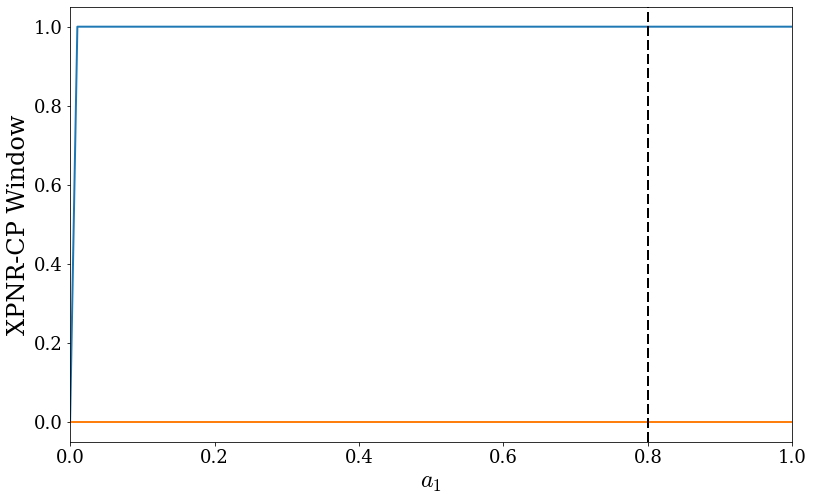

In [13]:
# Define parameter range
a1_range = linspace(0,1,100)
theta_LS = 0.6
q = 4.0

# Default version
default_window = array( [ PNRwindow( q, a1, theta_LS, UseHighMassRatioVersion=0 ) for a1 in a1_range ] )
# High q version
himasra_window = array( [ PNRwindow( q, a1, theta_LS, UseHighMassRatioVersion=1 ) for a1 in a1_range ] )

figure( figsize=2*figaspect(0.618) )
plot( a1_range, default_window, lw=2, label='Default' )
plot( a1_range, himasra_window, lw=2, label='High mass ratio' )
axvline(0.8,ls='--',color='k',lw=2)
xlim(lim(a1_range))

# xref = 0.8
# dx = 0.02
# xlim( xref-dx,xref+10*dx )

xlabel('$a_1$')
ylabel('XPNR-CP Window')

### Visualize window along $\theta_{LS}$

Text(0, 0.5, 'XPNR-CP Window')

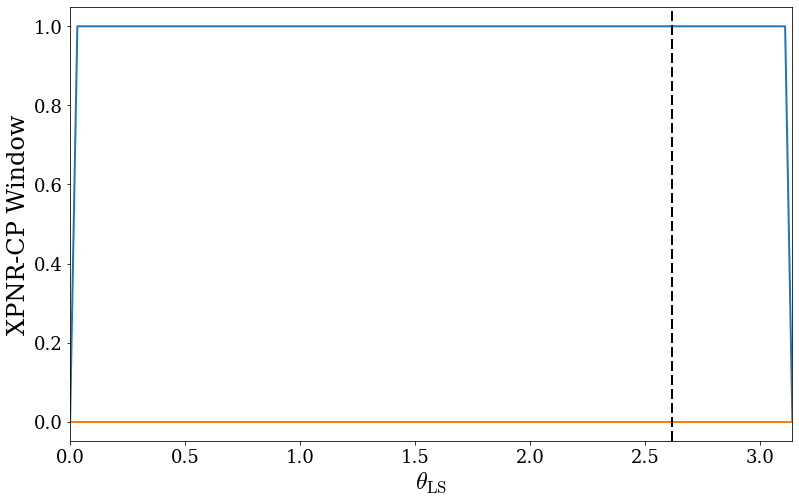

In [14]:

# Define parameter range
a1_range = 0.6
theta_LS_range = linspace(0,pi,100)
q = 4.0

# Default version
default_window = array( [ PNRwindow( q, a1, theta_LS, UseHighMassRatioVersion=0 ) for theta_LS in theta_LS_range ] )
# High q version
himasra_window = array( [ PNRwindow( q, a1, theta_LS, UseHighMassRatioVersion=1 ) for theta_LS in theta_LS_range ] )

figure( figsize=2*figaspect(0.618) )
plot( theta_LS_range, default_window, lw=2, label='Default' )
plot( theta_LS_range, himasra_window, lw=2, label='High mass ratio' )
axvline(150*pi/180,ls='--',color='k',lw=2)
xlim(lim(theta_LS_range))

# xref = 150*pi/180
# dx = 0.02
# xlim( xref-dx,xref+2*dx )

xlabel(r'$\theta_\mathrm{LS}$')
ylabel('XPNR-CP Window')

### Visualize both windows along $q=m_1/m_2$ ans $a_1$

In [15]:
a1_range = linspace(0,1,20)
q_range = linspace(1,16,20)
theta_LS = 30*pi/180

default_window = zeros( (len(a1_range),len(q_range)) )
himasra_window = default_window.copy()
for j,q in enumerate(q_range):
    for k,a1 in enumerate(a1_range):
        # Defualt version
        default_window[j,k] = PNRwindow( q, a1, theta_LS, UseHighMassRatioVersion=0 )
        # High q version
        himasra_window[j,k] = PNRwindow( q, a1, theta_LS, UseHighMassRatioVersion=1 )


(50, 2)
(50, 2)


Text(0.5, 1.0, 'High Mass Ratio Window')

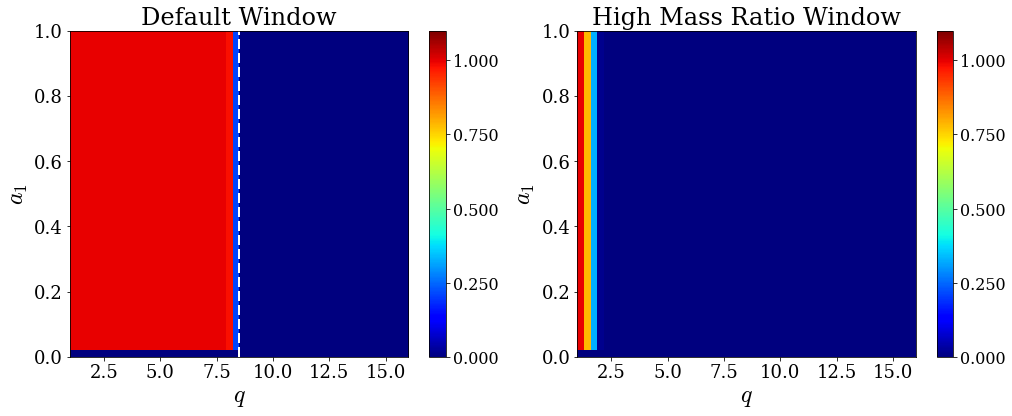

In [16]:
fig,ax = subplots( 1,2, figsize=1.5*figaspect(0.45*0.8) )
ax = ax.flatten()

sca(ax[0])
domain = vstack([q_range, a1_range]).T;
print( domain.shape )
splot( domain, default_window.T, ax=gca() )
axvline(8+0.5,ls='--',c='w',lw=2)
# axhline( 0.8 ,ls='--',c='w',lw=2)
xlabel('$q$')
ylabel('$a_1$')
title('Default Window')
ax = ax.flatten()

sca(ax[1])
domain = vstack([q_range, a1_range]).T;
print( domain.shape )
splot( domain, himasra_window.T, ax=gca() )
# axvline(8,ls='--',c='w',lw=2)
# axhline( 0.8 ,ls='--',c='w',lw=2)
xlabel('$q$')
ylabel('$a_1$')
title('High Mass Ratio Window')